# Experiments 2.1 and 2.2

Experiment 2.1 is the sensitivity experiment with differing winter 
nitrate pools.
Experiment 2.2 is the sensitivity experiment with differing winter 
silicic acid pools.

Uncomment for experiment 2.1:

In [1]:
# dirname_prefix\
# ='../../run_20230324_0000_EXP2_1rbcsno3times'
# dirname_suffix\
# ='sioh4times1_00'
# outfile_biomass\
# ='car.0000000000.t001.year10.groups.vint100m.5sims.exp2.1.png'
# outfile_percentage\
# ='car.0000000000.t001.year10.groups.percentage.5sims.exp2.1.png'
# label_prefix\
# ='N*'

Uncomment for experiment 2.2:

In [2]:
dirname_prefix\
='../../run_20230324_0000_EXP2_1rbcsno3times1_00sioh4times'
dirname_suffix\
=''
outfile_biomass\
='car.0000000000.t001.year10.groups.vint100m.5sims.exp2.2.png'
outfile_percentage\
='car.0000000000.t001.year10.groups.percentage.5sims.exp2.2.png'
label_prefix\
='Si*'

# First, load libraries

In [3]:
import cycler
import datetime
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pandas as pd
import scipy.signal
import sys
import time

sys.path.insert(1, os.path.join(sys.path[0], '..'))
import netcdf_tools
import read_mitgcm
import vstats

plt.close("all")

# Select year

In [4]:
years=range(1,11)
nbyears=len(years)
first_year=np.arange(0,365)
last_year_min=365*(nbyears-1)+0
last_year_max=365*(nbyears-1)+365
last_year_bounds=(last_year_min,last_year_max)
last_year=np.arange(last_year_min,last_year_max)
first_year366=np.arange(0,366) # first year for heatmaps

# Grid

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [5]:
gridfile='../grid.t001.nc'
drF=netcdf_tools.read_netcdf(gridfile,'drF')

RC is the r coordiante of cell center (in m)

In [6]:
RC=netcdf_tools.read_netcdf(gridfile,'RC')

RF is the r coordinate of cell interface (in m)

In [7]:
RF=netcdf_tools.read_netcdf(gridfile,'RF')

# Intervals for slicing

The vertical grid cells wanted are those between 0 and 100 m.

In [8]:
RF_above105=RF[RF>-105]
# RF are the array containing the vertical cell interfaces.
# So, the number of vertical cell interfaces is RF.size.
# So, the number of vertical cells is RF.size-1.
# By symetry, RF_above105 is the array containing the vertical cell
# interfaces above 105 m depth.
# So,, the number of vertical cells above 105 m depth is
# RF_above105.size-1
ndepths=RF_above105.size-1
# idepths=np.arange(0,ndepths)
idepths_min=0
idepths_max=ndepths
idepths_bounds=(idepths_min,idepths_max)
idepths=np.arange(idepths_min,idepths_max)

The time steps wanted are the 365 days of the last year.

In [9]:
iTs_bounds=last_year_bounds
iTs=last_year

# Forcing field of ice

In [10]:
ice=np.fromfile('../../../gud_1d_35+16/input_noradtrans/input/siarea.nemo.2016.365.32bits.bin',
                dtype='>f')

# Simulation of chlorophyll $a$ (0-100m)

In [11]:
infile='../chl.0000000000.t001.nc'
itracers_chl=np.arange(70,103)
itracers=itracers_chl
array1d_iT_modvintchl=read_mitgcm.read_array1d_iT_vint(
    infile=infile,drF=drF,itracers=itracers,idepths=idepths,iTs=iTs
)

## Simulation of chlorophyll $a$ (0-100m): bloom peak

The first local maximum was July 16 with 40.3 mg Chl m^{-2}. The global maximum was August 2 with 42.6 mg Chl m^{-3}.

Fig. 9 of Benoit-Gagne et al. (submitted; EXP-3 of my Chapter 1) shows that the first local maximum moved little from one sensitivity experiment on winter nitrate with the other.
However, the global maximum jumped between the standard run and the sensitivity experiments with decreased winter nitrate.
Because of this, we considered the bloom peak as the first local maximum.

In [12]:
global_maximum_date=np.nanargmax(array1d_iT_modvintchl)

In [13]:
first_local_maximum_date=scipy.signal.argrelextrema(array1d_iT_modvintchl,
                                                    np.greater)[0][0]

In [14]:
# date_peak=global_maximum_date
date_peak=first_local_maximum_date

Day of year

In [15]:
date_peak+1

195

In [16]:
year=2016
first_local_maximum_dates=datetime.datetime(year,1,1)\
+ datetime.timedelta(first_local_maximum_date.item())
first_local_maximum_dates.strftime("%B %d")

'July 13'

In [17]:
first_local_maximum_value=array1d_iT_modvintchl[date_peak]

(in $mg\ Chl\ m^{-2}$)

In [18]:
first_local_maximum_value

42.505973706471856

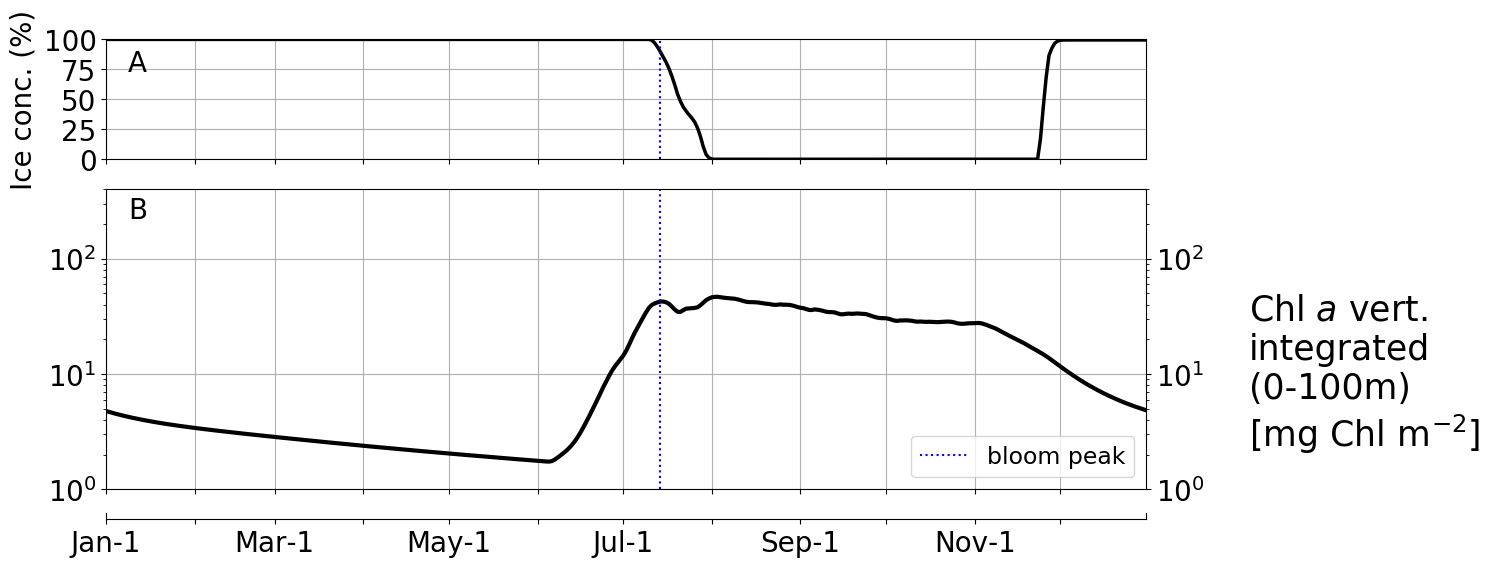

In [19]:
with plt.style.context('../validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                   181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc. (%)')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.8,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':',
               label='bloom peak')

    # --- CHLOROPHYLL A
    ax=axs[1]
    h1=ax.plot(first_year,array1d_iT_modvintchl,color='black',lw=3)
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(labelleft=True, labelright=True)
    ax.set_ylim(1E0,4E2)
    ax.grid()
    ax.text(400,10,'Chl $a$ vert.\nintegrated\n(0-100m)\n[$\mathrm{mg\ Chl\ m^{-2}}$]',
            horizontalalignment = 'left',
            verticalalignment = 'center',
            fontsize=25)
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':',
               label='bloom peak')
    ax.legend(loc='lower right')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.70  ,0.65,.20])
    axs[1].set_position( [0.12,0.15  ,0.65,.50])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])

    # --- SAVE
#     plt.savefig('chl.0000000000.t001.lastyear.logchlvint100m.png')

# Experiment 2.1 or 2.2

Simulations with differing winter nutrients pools.

# Simulation of the biogeochemical functional groups

In [20]:
itracers_diatom=np.arange(35,44)
itracers_dino  =np.arange(44,54)
itracers_other =np.arange(25,30)
itracers_pico  =np.arange(21,25)
molarmassC=12.0107 # g C (mol C)^-1
allsim=dict()
sims                 =['0.25','0.50','0.75','1.00','1.25','1.50','1.75','2.00']
sims_4sims=['0.25','0.50',                     '1.50',       '2.00']
sims_7sims=['0.25','0.50','0.75',       '1.25','1.50','1.75','2.00']

In [21]:
for sim in sims:
    infile=dirname_prefix+sim.replace('.','_')+dirname_suffix\
    +'/car.0000000000.t001.nc'
    # mmol C m^-2 -> mg C m^-2
    array1d_iT_simdiatomvint=read_mitgcm.read_array1d_iT_vint(
        infile=infile,
        drF=drF,
        itracers=itracers_diatom,
        idepths=idepths,
        iTs=iTs)*molarmassC
    array1d_iT_simdinovint=read_mitgcm.read_array1d_iT_vint(
        infile=infile,
        drF=drF,
        itracers=itracers_dino,
        idepths=idepths,
        iTs=iTs)*molarmassC
    array1d_iT_simothervint=read_mitgcm.read_array1d_iT_vint(
        infile=infile,
        drF=drF,
        itracers=itracers_other,
        idepths=idepths,
        iTs=iTs)*molarmassC
    array1d_iT_simpicovint=read_mitgcm.read_array1d_iT_vint(
        infile=infile,
        drF=drF,
        itracers=itracers_pico,
        idepths=idepths,
        iTs=iTs)*molarmassC
    array1d_iT_simtotalvint=array1d_iT_simdiatomvint\
    +array1d_iT_simdinovint+array1d_iT_simothervint+array1d_iT_simpicovint
    array1d_iT_simdiatomperc=array1d_iT_simdiatomvint\
    /array1d_iT_simtotalvint*100
    array1d_iT_simdinoperc=array1d_iT_simdinovint\
    /array1d_iT_simtotalvint*100
    array1d_iT_simotherperc=array1d_iT_simothervint\
    /array1d_iT_simtotalvint*100
    array1d_iT_simpicoperc=array1d_iT_simpicovint\
    /array1d_iT_simtotalvint*100
    array1d_iT_simphytovintonesim=pd.DataFrame(
        {'diatom':array1d_iT_simdiatomvint,
         'dino':array1d_iT_simdinovint,
         'other':array1d_iT_simothervint,
         'pico':array1d_iT_simpicovint,
         'total':array1d_iT_simtotalvint,
         'diatom_percentage':array1d_iT_simdiatomperc,
         'dino_percentage':array1d_iT_simdinoperc,
         'other_percentage':array1d_iT_simotherperc,
         'pico_percentage':array1d_iT_simpicoperc
        })
    allsim[sim]=array1d_iT_simphytovintonesim

In [22]:
colors_8sims=np.linspace(0,1,8)
ls_8sims=np.array([':','-.','--','--','--','--','-.',':'])
colors_4sims=np.array(colors_8sims[[0,1,4,6]])
ls_4sims=np.array(ls_8sims[[0,1,4,6]])
cc_8sims=cycler.cycler(color=plt.cm.viridis(colors_8sims),
                       linestyle=ls_8sims)
cc_4sims=cycler.cycler(color=plt.cm.viridis(colors_4sims),
                       linestyle=ls_4sims)

In [23]:
# https://stackoverflow.com/questions/10101141/matplotlib-legend-add-items-across-columns-instead-of-down
# answer by Avaris
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

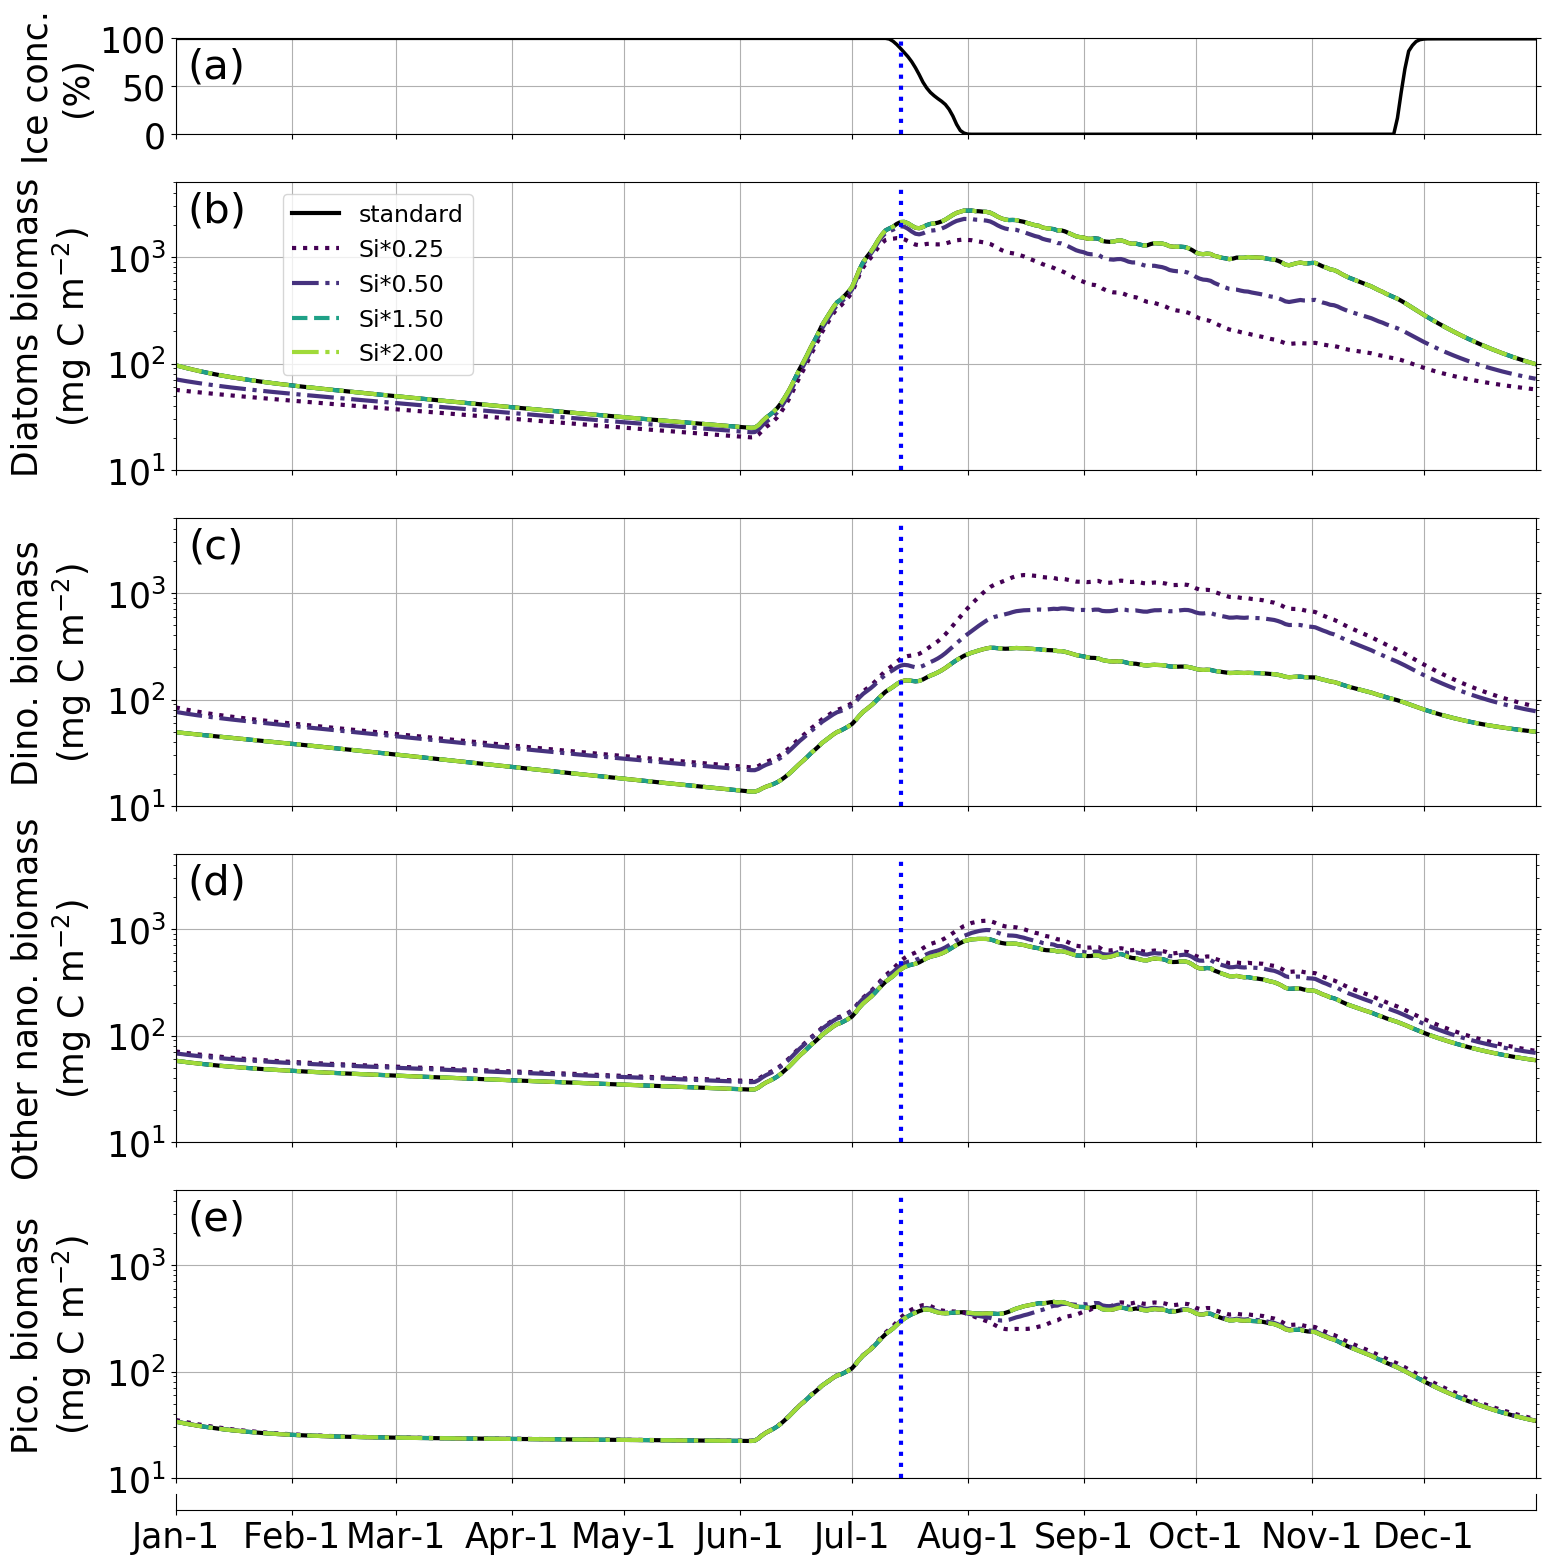

In [24]:
def make_plots(axs):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','Feb-1','Mar-1','Apr-1','May-1','Jun-1',
            'Jul-1','Aug-1','Sep-1','Oct-1','Nov-1','Dec-1')

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.yaxis.set_ticks_position('both')
    ax.set_ylabel('Ice conc.\n(%)')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.7,'(a)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- DIATOMS
    ax=axs[1]
    h=ax.plot(first_year,allsim['1.00']['diatom'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['diatom'].to_numpy(),
                  label=label_prefix+sim)
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Diatoms biomass\n($\mathrm{ mg\ C\ m^{-2} }$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(1E1,5E3)
    ax.grid()
    ax.legend(loc='upper left',bbox_to_anchor=(0.07,1.00))
    plt.text(0.03,0.90,'(b)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- DINOFLAGELLATES
    ax=axs[2]
    h=ax.plot(first_year,allsim['1.00']['dino'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['dino'].to_numpy(),
                  label='N*'+sim)
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Dino. biomass\n($\mathrm{ mg\ C\ m^{-2} }$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(1E1,5E3)
    ax.grid()
    plt.text(0.03,0.90,'(c)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- OTHER NANOPHYTOPLANKTON
    ax=axs[3]
    h=ax.plot(first_year,allsim['1.00']['other'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['other'].to_numpy(),
                  label='N*'+sim)
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Other nano. biomass\n($\mathrm{ mg\ C\ m^{-2} }$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(1E1,5E3)
    ax.grid()
    plt.text(0.03,0.90,'(d)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- PICOPHYTOPLANKTON
    ax=axs[4]
    h=ax.plot(first_year,allsim['1.00']['pico'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['pico'].to_numpy(),
                  label='N*'+sim)
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Pico. biomass\n($\mathrm{ mg\ C\ m^{-2} }$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(1E1,5E3)
    ax.grid()
    plt.text(0.03,0.90,'(e)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- ADDITIONAL X-AXIS
    ax=axs[5]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.92  ,0.85,0.06])
    axs[1].set_position( [0.12,0.71  ,0.85,0.18])
    axs[2].set_position( [0.12,0.50  ,0.85,0.18])
    axs[3].set_position( [0.12,0.29  ,0.85,0.18])
    axs[4].set_position( [0.12,0.08  ,0.85,0.18])
    axs[5].set_position( [0.12,0.06  ,0.85,0.01])

with plt.style.context('groups_time_series.mplstyle'):    
    # Plot
    fig,axs=plt.subplots(6,1,sharex=False,figsize=(16, 16))
    make_plots(axs)
    fig.align_ylabels(axs[:])

    # --- SAVE
    plt.savefig(outfile_biomass)

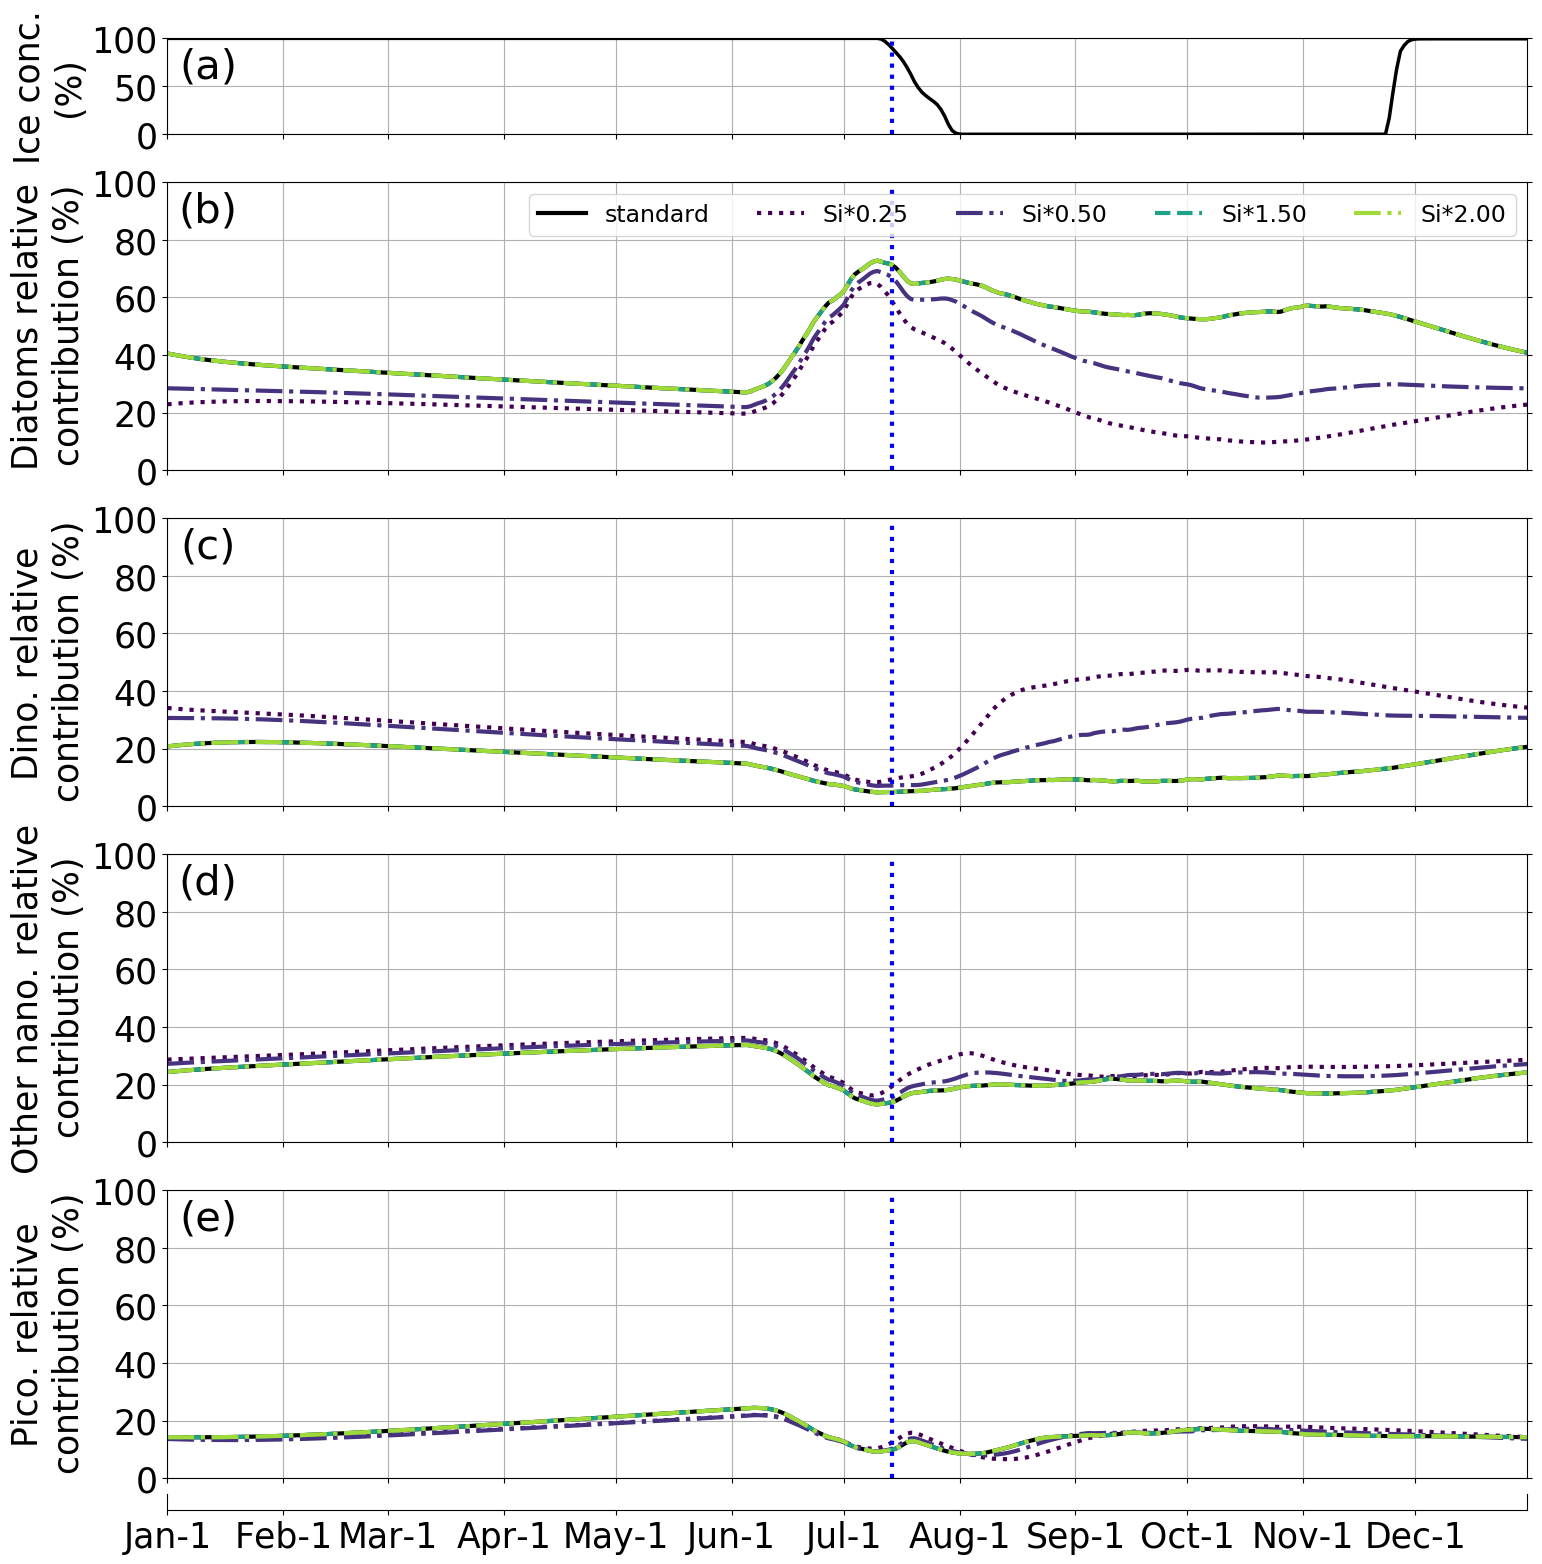

In [25]:
def make_plots(axs):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','Feb-1','Mar-1','Apr-1','May-1','Jun-1',
            'Jul-1','Aug-1','Sep-1','Oct-1','Nov-1','Dec-1')

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.yaxis.set_ticks_position('both')
    ax.set_ylabel('Ice conc.\n(%)')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.7,'(a)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- DIATOMS
    ax=axs[1]
    h=ax.plot(first_year,allsim['1.00']['diatom_percentage'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['diatom_percentage'].to_numpy(),
                  label=label_prefix+sim)
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Diatoms relative\ncontribution ($\%$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(0,100)
    ax.grid()
    legend_handles,legend_labels=ax.get_legend_handles_labels()
    ncol=6
    ax.legend(flip(legend_handles, ncol),flip(legend_labels, ncol),
              loc='upper right',ncol=ncol)
    plt.text(0.03,0.90,'(b)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- DINOFLAGELLATES
    ax=axs[2]
    h=ax.plot(first_year,allsim['1.00']['dino_percentage'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['dino_percentage'].to_numpy(),
                  label='N*'+sim)
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Dino. relative\ncontribution ($\%$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.90,'(c)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- OTHER NANOPHYTOPLANKTON
    ax=axs[3]
    h=ax.plot(first_year,allsim['1.00']['other_percentage'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['other_percentage'].to_numpy(),
                  label='N*'+sim)
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Other nano. relative\ncontribution ($\%$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.90,'(d)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- PICOPHYTOPLANKTON
    ax=axs[4]
    h=ax.plot(first_year,allsim['1.00']['pico_percentage'].to_numpy(),
              color='black',ls='-',label='standard')
    ax.set_prop_cycle(cc_4sims)
    for sim in sims_4sims:
        h=ax.plot(first_year,allsim[sim]['pico_percentage'].to_numpy(),
                  label='N*'+sim)
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Pico. relative\ncontribution ($\%$)')
    ax.yaxis.set_ticks_position('both')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.90,'(e)',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding a vertical line at the bloom peak
    ax.axvline(date_peak,color='b',linestyle=':')

    # --- ADDITIONAL X-AXIS
    ax=axs[5]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.92  ,0.85,0.06])
    axs[1].set_position( [0.12,0.71  ,0.85,0.18])
    axs[2].set_position( [0.12,0.50  ,0.85,0.18])
    axs[3].set_position( [0.12,0.29  ,0.85,0.18])
    axs[4].set_position( [0.12,0.08  ,0.85,0.18])
    axs[5].set_position( [0.12,0.06  ,0.85,0.01])

with plt.style.context('groups_time_series.mplstyle'):    
    # Plot
    fig,axs=plt.subplots(6,1,sharex=False,figsize=(16, 16))
    make_plots(axs)
    fig.align_ylabels(axs[:])

    # --- SAVE
    plt.savefig(outfile_percentage)